# DIABETES PREDICTOR

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOADING DATASET

In [2]:
data = pd.read_csv('C:\\Users\\HP\\Downloads\\diabetes.csv')

In [3]:
data.head()#displaying first 5 records of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# DATA PREPROCESSING

In [4]:
data.isnull().sum()  #no null values in colums

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data[data.isnull().any(axis=1)] #no null values along rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# EXPLORATORY DATA ANALYSIS

In [6]:
#Checking out the the number of rows and columns in the dataframe
data.shape

(768, 9)

In [7]:
#Checking out the datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


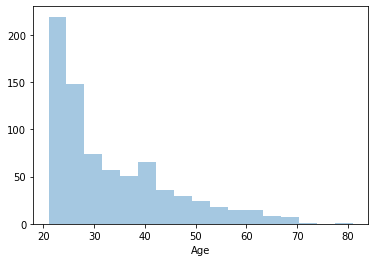

In [9]:
sns.distplot(data['Age'], kde=False, axlabel= 'Age')
# we have females majorly of age between 20-70 and a few between 70-80

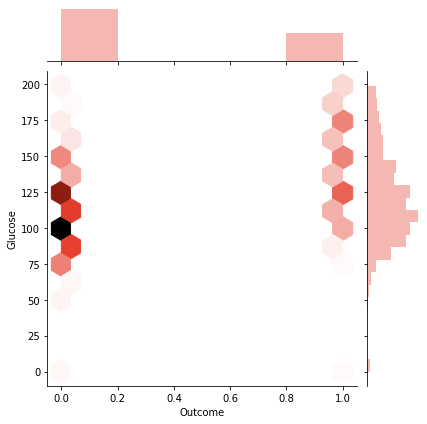

In [10]:
sns.jointplot(x='Outcome',y='Glucose', data= data, kind='hex',color="#e74c3c")
# females with higher glucose have higher probability of diabetes

In [11]:
#Assigning values to x and y
x = data.iloc[:, [0,1,2,3,4,5,6,7,8]].values
y= data.iloc[:,8].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

# FEATURE SCALING

In [13]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test= s.transform(x_test)

# SUPPORT VECTOR MACHINE MODEL

In [14]:
from sklearn import svm
clf=svm.SVC()
clf.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# PREDICTION AND EVALUATION

In [15]:
yp=clf.predict(x_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
print("CONFUSION MATRIX ")
print(confusion_matrix(y_test,yp))

CONFUSION MATRIX 
[[130   0]
 [  1  61]]


In [22]:
print("CLASSIFICATION REPORT ")
print(classification_report(y_test,yp))

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       130
           1       1.00      0.98      0.99        62

    accuracy                           0.99       192
   macro avg       1.00      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



In [23]:
print("ACCURACY OF MODEL: ",accuracy_score(y_test,yp))

ACCURACY OF MODEL:  0.9947916666666666
